___
# Ciência dos Dados - PROJETO 1

Carlos Sampaio Cherto
___

Bens de entretenimento afetando a segurança alimentar

___
## Introdução

Atualmente, existe uma parcela significativamente grande da população brasileira sofrendo de insegurança alimentar. Essa situação é especialmente séria no Nordeste, onde cerca de 40% da população sofre desse mal. A proposta desta pesquisa é analizar a quantidade de nordestinos que sofrem de insegurança alimentar mas possuem bens de entretenimento (televisores). Além disso, também será estudada a parcela desse grupo que não possue bens que poderiam contribuír para uma maior segurança alimentar, como geladeiras e freezers, que poderiam preservar ou aumentar a qualidade nutricional dos alimentos. Caso a pesquisa revele um grande número de pessoas que se encaixam no caso acima, talvez haja um problema de falta de instrução. Neste caso, pode ser de interesse para o governo investir em campanhas que estimulem diferentes preferências financeiras, potencialmente melhorando a saúde de muitos nordestinos.

Pergunta: Existe uma quantidade significativa de nordestinos em situação de pobreza e de insegurança alimentar que optam por comprar televisores ao invés de investir em bens que assegurariam uma maior segurança alimentar, como geladeiras e freezers?

___
## Análise e Resultados

In [111]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [112]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User-pc\Desktop\Insper\Semestre 2\Ciencia dos Dados\Projeto 1


In [113]:
data=pd.read_csv('DOM2009.csv',sep=',')

In [114]:
#Selecionando colunas de interesse
notdata=data.iloc[:,[66,35,38,39,64]]

#Removendo dados que não pertencem ao Nordeste
notdata=notdata[(data.UF>=21)&(data.UF<=29)]

#Filtrando NaNs
notdata=notdata[(data.V4623==1)|(data.V4623==2)|(data.V4623==3)|(data.V4623==4)|(data.V4623==6)|(data.V4623==7)|(data.V4623==8)|(data.V4623==9)]
notdata=notdata[(data.V0228==2)|(data.V0228==4)|(data.V0228==6)]
notdata=notdata[(data.V0229==1)|(data.V0229==3)]
notdata=notdata[(data.V0226==2)|(data.V0226==4)]

C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [115]:
#Nomeando os valores das variáveis qualitativas através do dicionário fornecido
notdata.V4623=notdata.V4623.astype('category')
notdata.V0228=notdata.V0228.astype('category')
notdata.V0229=notdata.V0229.astype('category')
notdata.V0226=notdata.V0226.astype('category')
notdata.V4623.cat.categories=('Menor sem risco','Menor, risco leve','Menor, risco moderado','Menor, risco grave','Sem menor, sem risco','Sem menor, risco leve','Sem menor, risco moderado','Sem menor, risco grave')
notdata.V0228.cat.categories=('Geladeira 2 portas','Geladeira 1 porta','Sem Geladeira')
notdata.V0226.cat.categories=('Com TV','Sem TV')
notdata.V0229.cat.categories=('Com freezer','Sem Freezer')

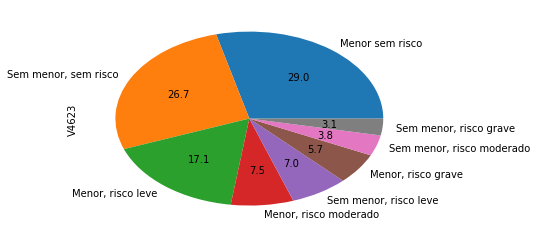

In [116]:
#Plotando um gráfico de setores que mostra a segurança alimentar da população nordestina
seg=notdata.V4623.value_counts(True)*100
seg.plot(kind='pie',autopct="%0.1f",legend=False)

C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


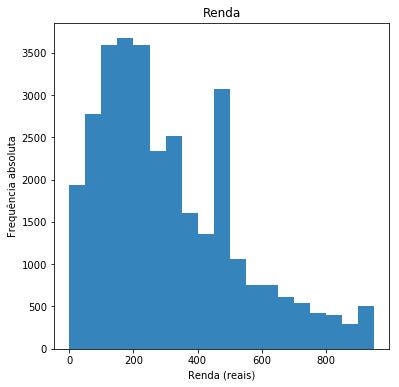

In [117]:
#Separando a renda em faixas e plotando um grafico
faixa = range(0,1000,50)
bins=pd.cut(notdata.V4621, bins=faixa)
bins.value_counts(sort=False, normalize=True)*100
plot = notdata.V4621.plot.hist(bins=faixa,title='Renda', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (reais)')
#após analizar o gráfico, filtramos os dados, deixando apenas domicílios com
#renda menor que 500 reais. Isso é feito para assegurar que estaremos analizando
#os dados de pessoas em situação de pobreza.
notdata=notdata[(data.V4614<500)]

In [118]:
#Filtrando os dados para deixar apenas pessoas em estado de insegurança alimentar.
notdata=notdata[(data.V4623==2)|(data.V4623==3)|(data.V4623==4)|(data.V4623==7)|(data.V4623==8)|(data.V4623==9)]


C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [119]:
#Criando uma tabela que compara a presença de geladeira e televisor nos domicílios
ct1=pd.crosstab(notdata.V0228,notdata.V0226, normalize=True)*100
ct1

V0226,Com TV,Sem TV
V0228,,
Geladeira 2 portas,3.568258,0.124268
Geladeira 1 porta,61.139712,3.692526
Sem Geladeira,19.758566,11.716670


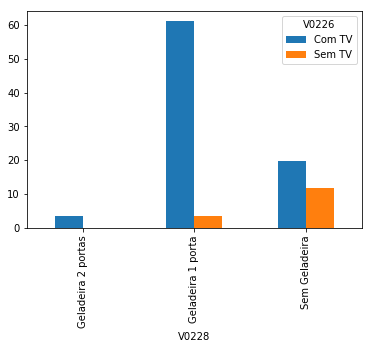

In [120]:
#Plotando a tabela
ct1.plot(kind='bar',legend=True)

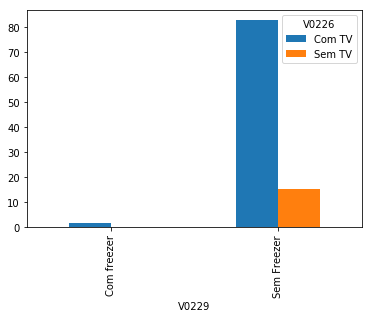

In [121]:
#Criando uma tabela e gráfico similar para comparar a presença de freezers com
#a do televisor nesta população
ct2=pd.crosstab(notdata.V0229,notdata.V0226, normalize=True)*100
ct2.plot(kind='bar',legend=True)

C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\User-pc\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


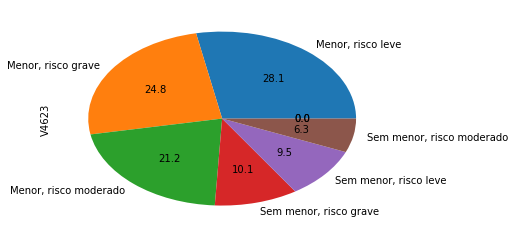

In [122]:
#Analizando a renda e a gravidade da insegurança alimentar na população que
#possui televisor mas não possui geladeira

notdata=notdata[(data.V0226==2)]
notdata=notdata[(data.V0228==6)]
seg2=notdata.V4623.value_counts(True)*100
seg2.plot(kind='pie',autopct="%0.1f",legend=False)

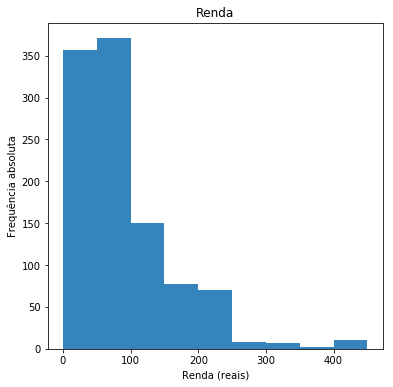

In [99]:
faixa = range(0,500,50)
bins=pd.cut(notdata.V4621, bins=faixa)
bins.value_counts(sort=False, normalize=True)*100
plot = notdata.V4621.plot.hist(bins=faixa,title='Renda', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (reais)')

___
## Conclusão 

Dos 36436 domicílios nordestinos analizados no início da pesquisa, foram encontrados 1113 que estavam em estado de pobreza e sofrendo de insegurança alimentar, mas que possuíam um televisor apesar de não terem uma geladeira. Deles, a maioria tinha uma renda mensal inferior a 100 reais e cerca de 35% foram classificados como sofrendo de insegurança alimentar grave. Os freezers se mostraram ainda menos presentes. Quase 80% dos nordestinos com renda inferior a 500 reais por mês possuíam televisor apesar de não terem freezers. Os dados encontrados sugerem que existe uma parcela significativa da população que procurou investir primeiro em um bem de entretenimento (o televisor) antes de investirem em uma maior segurança alimentar. Esses dados apontam que talvez seja de interesse investir em campanhas que estimulem a população a investir uma maior parte de sua renda em segurança alimentar.